## Parte 1

hay 100 dispositivos conectados a la red, hay que encontrar la forma de desconectar la mitad cortando solo 3 cables.

In [14]:
import regex as re
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def get_input(filename):
    graph = {}
    with open(filename) as file:
        for line in file:
            parts = re.findall('\w+', line)
            for p in parts[1:]:
                graph[parts[0]] = graph.get(parts[0], []) + [p]
                graph[p] = graph.get(p, []) + [parts[0]]
    return graph

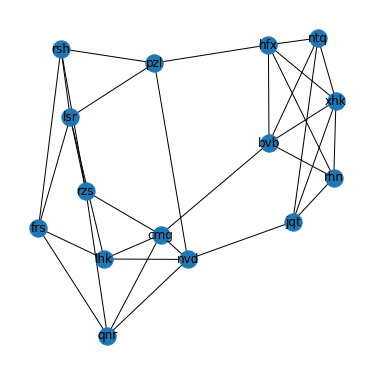

In [7]:
graph = get_input('test.txt')
G = nx.from_dict_of_lists(graph)
fig = plt.figure(1, figsize=(5, 5))
nx.draw(G, with_labels=True, font_weight='normal')

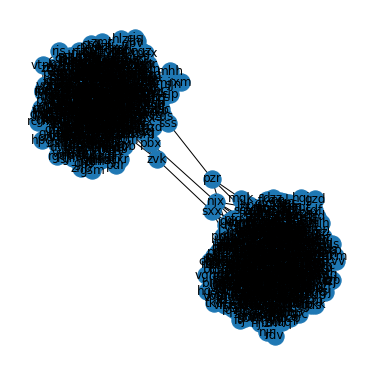

In [8]:
graph = get_input('input.txt')
G = nx.from_dict_of_lists(graph)
fig = plt.figure(1, figsize=(5, 5))
nx.draw(G, with_labels=True, font_weight='normal')

In [9]:
#se distingue regular pero son:
#pzr <-> sss
#njx <-> pbx
#sxx <-> zvk

graph['pzr'].remove('sss')
graph['sss'].remove('pzr')
graph['njx'].remove('pbx')
graph['pbx'].remove('njx')
graph['sxx'].remove('zvk')
graph['zvk'].remove('sxx')

G = nx.from_dict_of_lists(graph)

acum = 1
for x in nx.connected_components(G):
    acum *= len(x)

acum

582590

In [17]:
#segunda opción sin sacarlo a ojo de la visualización
def mincut(graph, ncuts):
    nodes = list(graph.keys())
    cut_value = 0
    
    G = nx.from_dict_of_lists(graph)
    nx.set_edge_attributes(G, 1, 'capacity')
    
    while cut_value != ncuts:
        a, b = random.choices(nodes, k=2)
        cut_value, partition = nx.minimum_cut(G, a, b)
    
    group1, group2 = partition
    return len(group1) * len(group2)

In [18]:
graph = get_input('test.txt')
result = mincut(graph, 3)
result

54

In [19]:
graph = get_input('input.txt')
result = mincut(graph, 3)
result

582590